In [1]:
library(TCGAbiolinks)
library(dplyr)
library(SummarizedExperiment)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPer

In [2]:
rse.gbm <- get(load("rnaseq.recurTum_NormTissue.GBM_20220603.rda")) 
dataPrep.gbm <- TCGAanalyze_Preprocessing(object = rse.gbm,
                                          cor.cut = 0.6,
                                          datatype="unstranded",
                                          filename="rnaseq.recurTum_NormTissue.GBM_20220607.correlation.png"
                                         )

Number of outliers: 0



In [3]:
table(rse.gbm$sample_type)


    Recurrent Tumor Solid Tissue Normal 
                 13                   5 

In [4]:
gbm.rnasdeq.dataNorm <- TCGAanalyze_Normalization(tabDF = dataPrep.gbm,
                                                  geneInfo = TCGAbiolinks::geneInfoHT,
                                                  method = "gcContent"
                                                 )

I Need about  14 seconds for this Complete Normalization Upper Quantile  [Processing 80k elements /s]  

Step 1 of 4: newSeqExpressionSet ...

Step 2 of 4: withinLaneNormalization ...

Step 3 of 4: betweenLaneNormalization ...

Step 4 of 4: .quantileNormalization ...



In [5]:
# Filtering
gbm.rnasdeq.dataFilt <- TCGAanalyze_Filtering(tabDF = gbm.rnasdeq.dataNorm,
                                              method = "quantile",
                                              qnt.cut = 0.25
                                             )

In [6]:
normalTissue <- colnames(rse.gbm)[rse.gbm$sample_type == "Solid Tissue Normal"]
#rse.gbm[rse.gbm$sample_type == "Solid Tissue Normal",]
recurTumor <- colnames(rse.gbm)[rse.gbm$sample_type == "Recurrent Tumor"]

gbm.rnaseqNormal.dataFilt <- subset(gbm.rnasdeq.dataFilt, 
                                    select = colnames(gbm.rnasdeq.dataFilt) %in% normalTissue)
gbm.rnaseqTumor.dataFilt <- subset(gbm.rnasdeq.dataFilt, 
                                    select = colnames(gbm.rnasdeq.dataFilt) %in% recurTumor)


In [7]:
# length(normalTissue)
# head(gbm.rnaseqNormal.dataFilt )
# head(gbm.rnaseqTumor.dataFilt)
# recurTumor

In [8]:
colnames(rse.gbm) #[rse.gbm$sample_type == "Solid Tissue Normal"]
colnames(gbm.rnasdeq.dataFilt)

[1] "TCGA-06-0171-02A-11R-2005-01" "TCGA-06-0211-02A-02R-2005-01"
 [3] "TCGA-06-0190-02A-01R-2005-01" "TCGA-06-0125-02A-11R-2005-01"
 [5] "TCGA-14-0736-02A-01R-2005-01" "TCGA-19-4065-02A-11R-2005-01"
 [7] "TCGA-19-0957-02A-11R-2005-01" "TCGA-06-0678-11A-32R-A36H-07"
 [9] "TCGA-14-1402-02A-01R-2005-01" "TCGA-06-0210-02A-01R-2005-01"
[11] "TCGA-06-0152-02A-01R-2005-01" "TCGA-06-0681-11A-41R-A36H-07"
[13] "TCGA-06-AABW-11A-31R-A36H-07" "TCGA-19-1389-02A-21R-2005-01"
[15] "TCGA-06-0675-11A-32R-A36H-07" "TCGA-06-0680-11A-32R-A36H-07"
[17] "TCGA-06-0221-02A-11R-2005-01" "TCGA-14-1034-02B-01R-2005-01"

[1] "TCGA-06-0125-02A-11R-2005-01" "TCGA-06-0152-02A-01R-2005-01"
 [3] "TCGA-06-0171-02A-11R-2005-01" "TCGA-06-0190-02A-01R-2005-01"
 [5] "TCGA-06-0210-02A-01R-2005-01" "TCGA-06-0211-02A-02R-2005-01"
 [7] "TCGA-06-0221-02A-11R-2005-01" "TCGA-14-0736-02A-01R-2005-01"
 [9] "TCGA-14-1034-02B-01R-2005-01" "TCGA-14-1402-02A-01R-2005-01"
[11] "TCGA-19-0957-02A-11R-2005-01" "TCGA-19-1389-02A-21R-2005-01"
[13] "TCGA-19-4065-02A-11R-2005-01" "TCGA-06-0675-11A-32R-A36H-07"
[15] "TCGA-06-0678-11A-32R-A36H-07" "TCGA-06-0680-11A-32R-A36H-07"
[17] "TCGA-06-0681-11A-41R-A36H-07" "TCGA-06-AABW-11A-31R-A36H-07"

In [9]:
rse.gbm

class: RangedSummarizedExperiment 
dim: 60660 18 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(18): TCGA-06-0171-02A-11R-2005-01 TCGA-06-0211-02A-02R-2005-01
  ... TCGA-06-0221-02A-11R-2005-01 TCGA-14-1034-02B-01R-2005-01
colData names(105): barcode patient ...
  paper_Telomere.length.estimate.in.blood.normal..Kb.
  paper_Telomere.length.estimate.in.tumor..Kb.

In [10]:
# exact order of gene names
identical(rownames(gbm.rnaseqTumor.dataFilt), rownames(gbm.rnaseqNormal.dataFilt))

[1] TRUE

In [11]:
# length(unique(geneIDs1$SYMBOL))

In [12]:
length(unique(rownames(gbm.rnaseqTumor.dataFilt) ))

[1] 45230

In [13]:
# rownames(gbm.rnaseqTumor.dataFilt) <- geneIDs1$SYMBOL
# rownames(gbm.rnaseqNormal.dataFilt) <- geneIDs1$SYMBOL

In [14]:
# rownames(gbm.rnaseqTumor.dataFilt)[! rownames(gbm.rnaseqNormal.dataFilt) %in% rownames(gbm.rnaseqTumor.dataFilt)]

In [15]:
gbm.DEG <- TCGAanalyze_DEA(mat1 = gbm.rnaseqNormal.dataFilt,
                           mat2 = gbm.rnaseqTumor.dataFilt,
                           Cond1type = "NORMAL", Cond2type = "RECURTUMOR",
                           fdr.cut = 0.01,
                           logFC.cut = 1,
                           method = "glmLRT"
                          )

Batch correction skipped since no factors provided

----------------------- DEA -------------------------------

o 5 samples in Cond1type NORMAL

o 13 samples in Cond2type RECURTUMOR

o 45230 features as miRNA or genes 

This may take some minutes...

----------------------- END DEA -------------------------------



In [16]:
head(gbm.DEG)

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000000003,3.048243,5.839949,37.54155,8.948630e-10,5.790365e-08,TSPAN6,protein_coding
ENSG00000000460,1.720776,2.106048,15.51685,8.177329e-05,7.213977e-04,C1orf112,protein_coding
ENSG00000000971,2.794246,8.507568,16.29962,5.407488e-05,5.114496e-04,CFH,protein_coding
ENSG00000001460,-1.670660,3.709343,17.42541,2.988048e-05,3.139359e-04,STPG1,protein_coding
ENSG00000001461,-2.065081,6.805469,19.18755,1.184834e-05,1.455065e-04,NIPAL3,protein_coding
ENSG00000001617,2.089107,1.368280,12.44901,4.182129e-04,2.794470e-03,SEMA3F,protein_coding


In [17]:
g4count <- read.csv("../downloadedDataGEO_20220524/Genes_G4number.in2csv.csv")
head(g4count)

,test_id,combined_exon_introns_window200
,<chr>,<int>
1,A1BG,1
2,A1BG-AS1,0
3,A1CF,0
4,A2M,0
5,A2M-AS1,0
6,A2ML1,2


In [18]:
modDEG <- gbm.DEG %>% left_join(y=g4count, by= c("gene_name" = "test_id"))  %>% 
dplyr::rename( g4Num = combined_exon_introns_window200) %>% na.omit() %>% as.data.frame(row.names = 1:nrow(.))
# dplyr::filter(g4Num > 3)
head(modDEG)

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type,g4Num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,3.048243,5.839949,37.54155,8.948630e-10,5.790365e-08,TSPAN6,protein_coding,2
2,1.720776,2.106048,15.51685,8.177329e-05,7.213977e-04,C1orf112,protein_coding,0
3,2.794246,8.507568,16.29962,5.407488e-05,5.114496e-04,CFH,protein_coding,0
4,-1.670660,3.709343,17.42541,2.988048e-05,3.139359e-04,STPG1,protein_coding,1
5,-2.065081,6.805469,19.18755,1.184834e-05,1.455065e-04,NIPAL3,protein_coding,0
6,2.089107,1.368280,12.44901,4.182129e-04,2.794470e-03,SEMA3F,protein_coding,8


In [19]:
modDEG[(modDEG$g4Num >= 5) & (abs(modDEG$logFC) > 1),]  %>% head()

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type,g4Num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
6,2.089107,1.368280,12.44901,4.182129e-04,0.0027944704,SEMA3F,protein_coding,8
12,-2.341434,1.831173,19.31947,1.105734e-05,0.0001369826,CYP26B1,protein_coding,5
30,-1.089065,3.288618,11.02429,8.992550e-04,0.0052542698,PDK2,protein_coding,6
32,-2.436745,3.659689,14.24390,1.605808e-04,0.0012671093,ABCC8,protein_coding,10
35,-1.971229,2.042710,15.17793,9.784021e-05,0.0008379687,CACNA1G,protein_coding,20
39,2.121390,2.205704,14.36005,1.509721e-04,0.0012049820,ALDH3B1,protein_coding,5


In [20]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



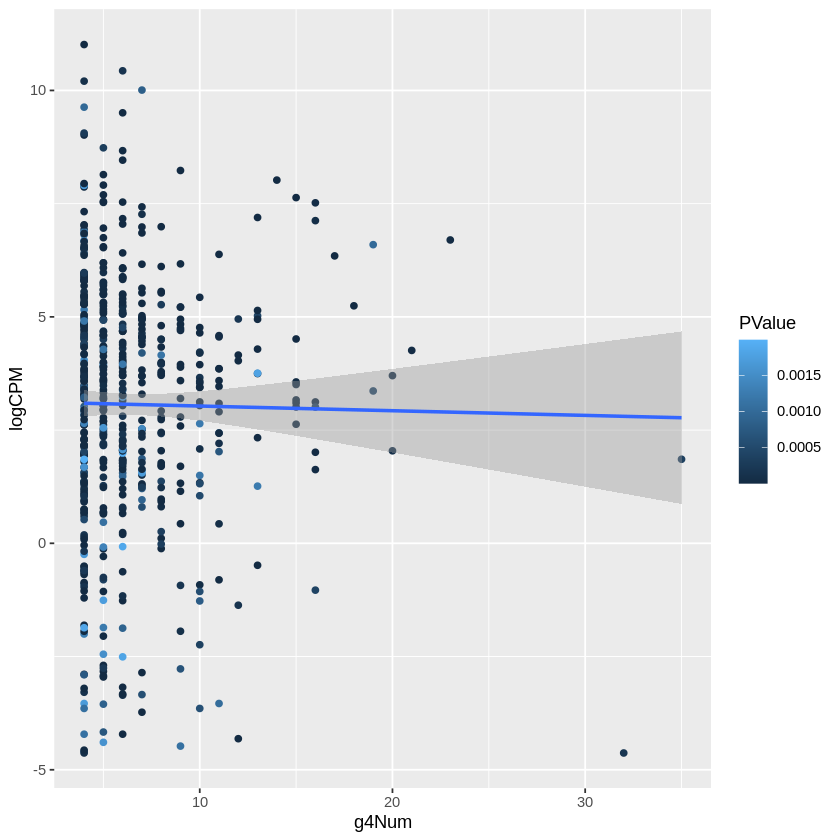

In [21]:
# binomial_smooth <- function(...) {
#   geom_smooth(method = "glm", method.args = list(family = "binomial"))
# }
ggplot(data = modDEG[(modDEG$g4Num >= 4) & (abs(modDEG$logFC) > 1.5) & (modDEG$PValue <= 0.05),],
       aes(x = g4Num, y = logCPM, color=PValue)) +
    geom_point() +
#     geom_smooth(se = TRUE,method = "gam", formula = y ~ s(x))
    geom_smooth(se = TRUE, method = "glm")

In [22]:
ansEA.gbm.normalVsTumor  <- TCGAanalyze_EAcomplete(
    TFname="DEA genes NORMAL Vs RECUR_GBM", 
    RegulonList = gbm.DEG$gene_name)

[1] "I need about  1 minute to finish complete  Enrichment analysis GO[BP,MF,CC] and Pathways... "
[1] "GO Enrichment Analysis BP completed....done"
[1] "GO Enrichment Analysis MF completed....done"
[1] "GO Enrichment Analysis CC completed....done"
[1] "Pathway Enrichment Analysis completed....done"


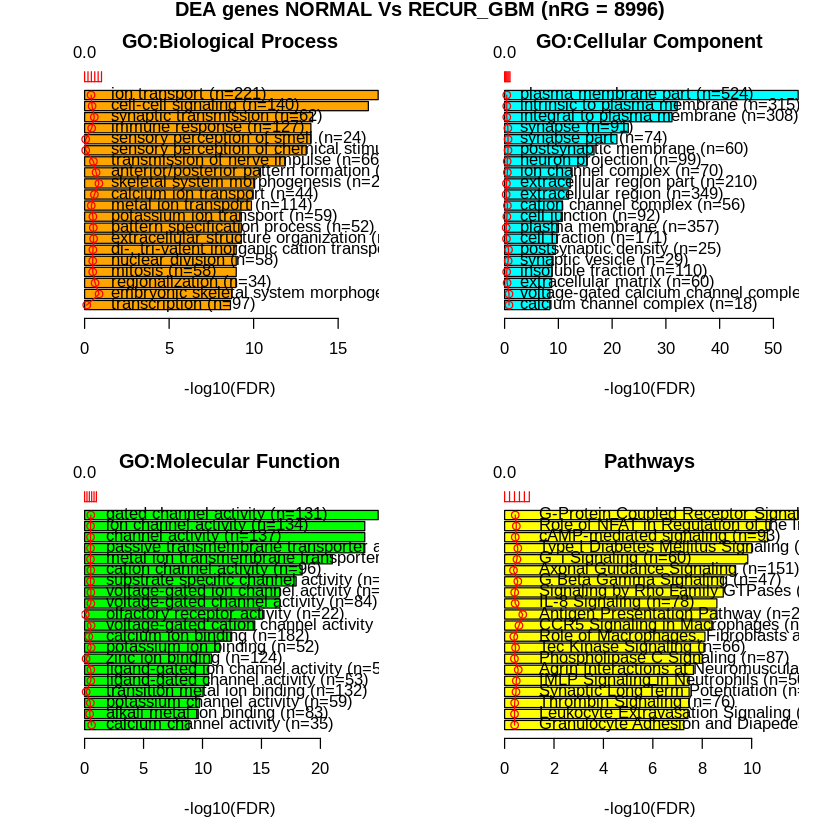

In [23]:
TCGAvisualize_EAbarplot(tf = rownames(ansEA.gbm.normalVsTumor$ResBP),
                        GOBPTab = ansEA.gbm.normalVsTumor$ResBP, 
                        GOCCTab = ansEA.gbm.normalVsTumor$ResCC,
                        GOMFTab = ansEA.gbm.normalVsTumor$ResMF, 
                        PathTab = ansEA.gbm.normalVsTumor$ResPat,
                        nRGTab = gbm.DEG$gene_name,
                        filename = NULL,
                        nBar = 20)

In [24]:
# ggplot(data = gbm.DEG
#       ) +
# geom_point(aes(x=logFC,y=-log10(PValue), alpha=-log10(PValue), size=-log10(PValue)))

In [25]:
?GDCquery

In [26]:
 print(TCGAbiolinks:::getGDCprojects()$project_id[grepl("TCGA", TCGAbiolinks:::getGDCprojects()$project_id)])

 [1] "TCGA-READ" "TCGA-UCS"  "TCGA-COAD" "TCGA-CESC" "TCGA-PAAD" "TCGA-ESCA"
 [7] "TCGA-KIRP" "TCGA-PCPG" "TCGA-HNSC" "TCGA-BLCA" "TCGA-STAD" "TCGA-SARC"
[13] "TCGA-CHOL" "TCGA-LAML" "TCGA-THYM" "TCGA-ACC"  "TCGA-SKCM" "TCGA-LUAD"
[19] "TCGA-LIHC" "TCGA-KIRC" "TCGA-KICH" "TCGA-DLBC" "TCGA-PRAD" "TCGA-OV"  
[25] "TCGA-MESO" "TCGA-LUSC" "TCGA-GBM"  "TCGA-UVM"  "TCGA-LGG"  "TCGA-BRCA"
[31] "TCGA-TGCT" "TCGA-THCA" "TCGA-UCEC"


In [32]:
combData <- cbind(gbm.rnaseqNormal.dataFilt,gbm.rnaseqTumor.dataFilt)

In [28]:
dim(gbm.rnaseqNormal.dataFilt)

[1] 45230     5

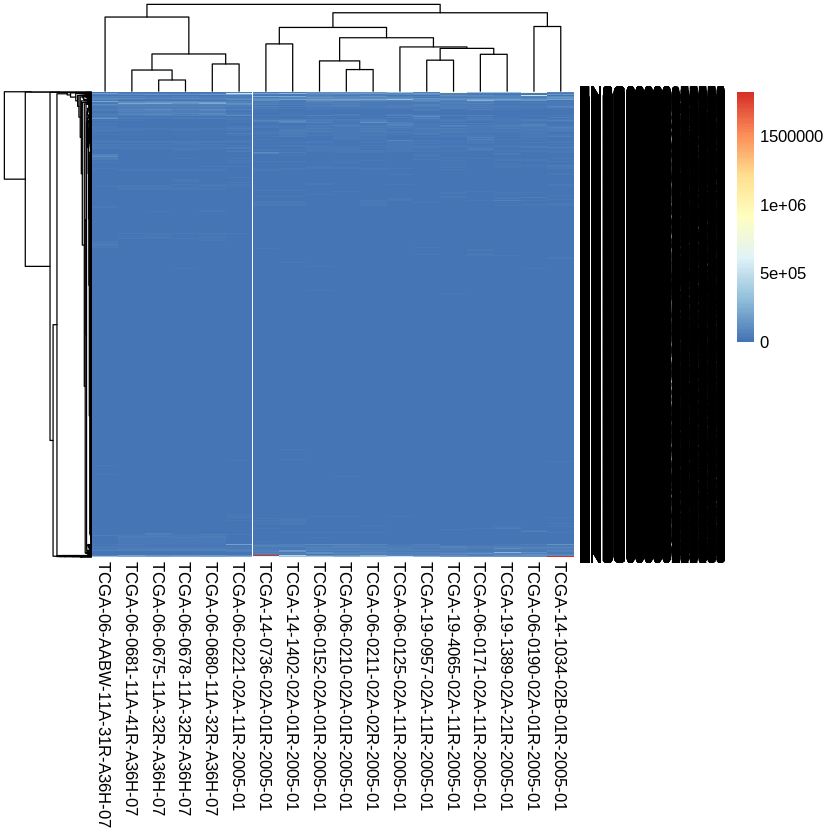

In [33]:
data_subset <- combData[rowSums(combData)>50000,]
pheatmap::pheatmap(data_subset)

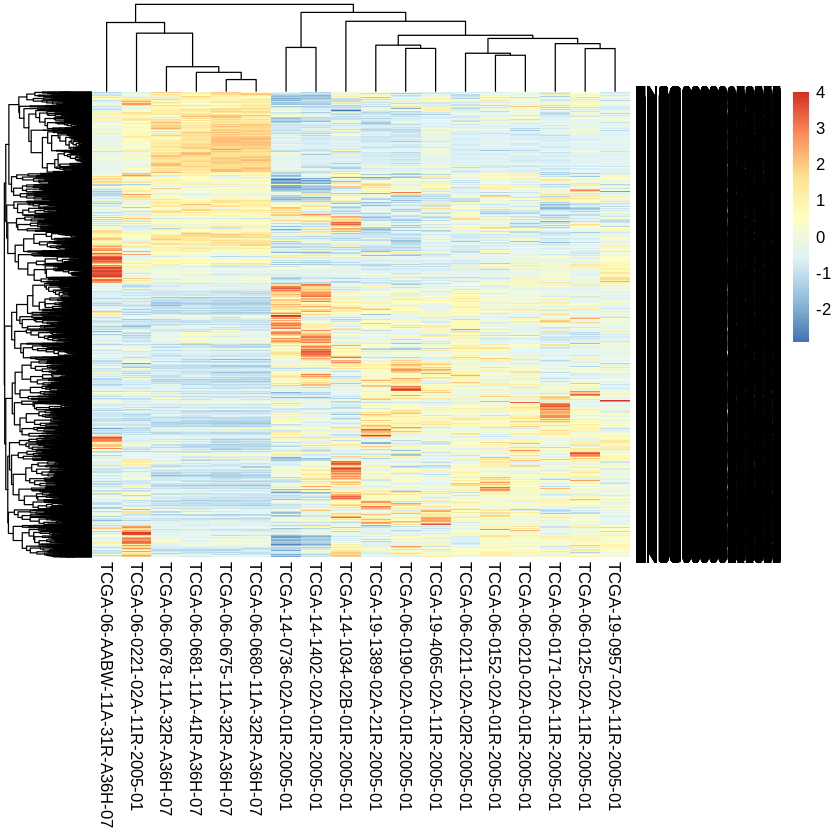

In [35]:
cal_z_score <- function(x){
  (x - mean(x)) / sd(x)
}
 
data_subset_norm <- t(apply(data_subset, 1, cal_z_score))
pheatmap::pheatmap(data_subset_norm)

In [37]:
dim(gbm.rnaseqNormal.dataFilt) #,
dim(gbm.rnaseqTumor.dataFilt)

[1] 45230     5

[1] 45230    13

In [40]:
sampCol <- data.frame(sample = rep(c("normal", "tumor"), c(5,13)))
row.names(sampCol) <- colnames(combData)
head(sampCol)

,sample
,<chr>
TCGA-06-0675-11A-32R-A36H-07,normal
TCGA-06-0678-11A-32R-A36H-07,normal
TCGA-06-0680-11A-32R-A36H-07,normal
TCGA-06-0681-11A-41R-A36H-07,normal
TCGA-06-AABW-11A-31R-A36H-07,normal
TCGA-06-0125-02A-11R-2005-01,tumor


In [42]:
head(data_subset_norm)

,TCGA-06-0675-11A-32R-A36H-07,TCGA-06-0678-11A-32R-A36H-07,TCGA-06-0680-11A-32R-A36H-07,TCGA-06-0681-11A-41R-A36H-07,TCGA-06-AABW-11A-31R-A36H-07,TCGA-06-0125-02A-11R-2005-01,TCGA-06-0152-02A-01R-2005-01,TCGA-06-0171-02A-11R-2005-01,TCGA-06-0190-02A-01R-2005-01,TCGA-06-0210-02A-01R-2005-01,TCGA-06-0211-02A-02R-2005-01,TCGA-06-0221-02A-11R-2005-01,TCGA-14-0736-02A-01R-2005-01,TCGA-14-1034-02B-01R-2005-01,TCGA-14-1402-02A-01R-2005-01,TCGA-19-0957-02A-11R-2005-01,TCGA-19-1389-02A-21R-2005-01,TCGA-19-4065-02A-11R-2005-01
ENSG00000000003,-1.0196779,-1.0591508,-1.0242190,-1.0490206,-1.0465753,0.5487588,-0.15267126,-0.4761395,-0.1610549,0.01290535,0.6601911,-0.6270447,1.8552071,1.5967120,1.98864647,-0.4059266,0.2574278,0.1016321
ENSG00000000971,-0.7591105,-0.8156123,-0.7817479,-0.8788044,-0.9492369,-0.3087460,-0.07614017,1.8140343,1.4152225,-0.06395082,-0.3151156,-0.4490610,0.5622886,-0.9210089,-0.03388986,-0.8626742,1.7574409,1.6661124
ENSG00000001461,0.1770849,0.4656345,0.2966788,0.3462751,3.6658259,-0.4524244,-0.57588750,-0.3034011,-0.5512652,-0.43952704,-0.6287668,-0.1917801,-0.4213535,-0.6682796,-0.62923575,0.5566196,-0.2547428,-0.3914550
ENSG00000001561,-0.1035541,0.3832857,-0.1130403,0.1716035,3.0601434,-0.7991483,-0.81923327,0.5050249,-0.7525958,-0.17833096,-0.9677914,-0.4553624,0.8678418,-1.0084883,-0.74510058,0.4589994,1.1051132,-0.6093663
ENSG00000001629,-1.4252221,-1.0929321,-1.1430777,-1.1889941,2.0946355,1.3811182,0.98659929,-0.2223322,-0.5781846,0.23079053,0.4827268,0.3624982,-0.5908721,1.2506188,0.39512305,0.3123526,-0.5050808,-0.7497671
ENSG00000001631,-1.2549899,-1.4775117,-1.2503541,-0.8346711,-0.4043079,0.2748470,0.97640852,-0.2938197,0.1527691,0.79020110,0.4880969,-0.9196620,-0.0944773,2.0805181,1.77764128,-0.1369728,0.5360009,-0.4097164


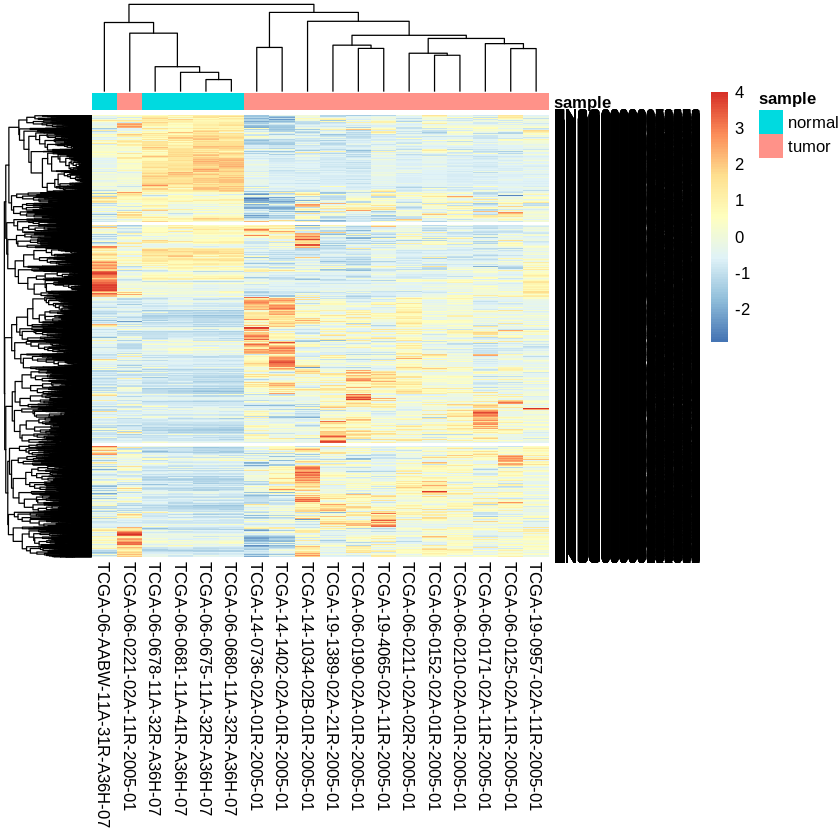

In [41]:
data_subset_norm <- t(apply(data_subset, 1, cal_z_score))
pheatmap::pheatmap(data_subset_norm, annotation_col = sampCol)